In [138]:
import pandas as pd
import numpy as np
import plotly.express as px

In [139]:
d_station_information = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json')
d = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_status.json')
len(d_station_information.data['stations'])

621

In [140]:
len(d.data[0])

621

In [141]:
d.data[0][0]

{'station_id': '1',
 'num_docks_disabled': 0,
 'num_bikes_disabled': 0,
 'legacy_id': '1',
 'is_renting': 1,
 'eightd_has_available_keys': False,
 'is_installed': 1,
 'is_returning': 1,
 'num_docks_available': 11,
 'last_reported': 1611652631,
 'num_ebikes_available': 0,
 'num_bikes_available': 4,
 'station_status': 'active'}

In [142]:
av_bikes = []
av_e_bikes = []
for i in range(len(d.data[0])):
    av_bikes.append(d.data[0][i]['num_bikes_available'])
    av_e_bikes.append(d.data[0][i]['num_ebikes_available'])
print('Available Bikes: ', pd.Series(av_bikes).sum())
print('Available E-Bikes: ', pd.Series(av_e_bikes).sum())

Available Bikes:  4744
Available E-Bikes:  280


In [143]:
#d.data['stations'][0]['num_bikes_available']

In [144]:
active_station = []
for i in range(len(d.data[0])):
    active_station.append(d.data[0][i]['is_renting'])
print('Active Stations: ', pd.Series(active_station).sum())

Active Stations:  618


In [145]:
print('Stations with 0 bikes available: ',av_bikes.count(0))
print('Stations with 0 e-bikes available: ',av_e_bikes.count(0))

Stations with 0 bikes available:  19
Stations with 0 e-bikes available:  436


In [146]:
# Evaluation: How many bikes and e-bikes are available at ACTIVE stations?
# (We learn that the given data for all available (e-)bikes always equals the available (e-)bikes at active stations.)

bikes_active_stations = []
e_bikes_active_stations = []
stat = []
inactive_station_id = []
for i in range(len(d.data[0])):
    if d.data[0][i]['is_renting'] == 1:
        bikes_active_stations.append(d.data[0][i]['num_bikes_available'])
        e_bikes_active_stations.append(d.data[0][i]['num_ebikes_available'])
        stat.append(d.data[0][i]['is_renting'])
    else:
        inactive_station_id.append(d.data[0][i]['station_id'])
print('Available Bikes in Active Stations: ', pd.Series(av_bikes).sum())
print('Available E-Bikes in Active Stations: ', pd.Series(av_e_bikes).sum())
print('Active Stations: ', pd.Series(stat).count())
print('Inactive Station IDs: ', inactive_station_id)

Available Bikes in Active Stations:  4744
Available E-Bikes in Active Stations:  280
Active Stations:  618
Inactive Station IDs:  ['248', '249', '342']


In [147]:
print('Number of active stations without available bikes: ', bikes_active_stations.count(0))
print('Number of active stations without available e-bikes: ', e_bikes_active_stations.count(0))

Number of active stations without available bikes:  19
Number of active stations without available e-bikes:  434


In [148]:
# Which are the stations without available (e-)bikes?

bike_empty_stat_id = []
e_bike_empty_stat_id = []
only_one_bike_stat_id = []
only_one_e_bike_stat_id = []
for i in range(len(d.data[0])):
    if d.data[0][i]['num_bikes_available'] == 0:
        bike_empty_stat_id.append(d.data[0][i]['station_id'])
    elif d.data[0][i]['num_ebikes_available'] == 0:
        e_bike_empty_stat_id.append(d.data[0][i]['station_id'])
    elif d.data[0][i]['num_bikes_available'] == 1:
         only_one_bike_stat_id.append(d.data[0][i]['station_id'])
    elif d.data[0][i]['num_ebikes_available'] == 1:
         only_one_e_bike_stat_id.append(d.data[0][i]['station_id'])

print('Stations numbers without bikes: ', bike_empty_stat_id)
print('Stations numbers without e-bikes: ', e_bike_empty_stat_id)
print('Stations numbers with only 1 bike left: ', only_one_bike_stat_id)
print('Stations numbers with only 1 e-bike left: ', only_one_e_bike_stat_id)

Stations numbers without bikes:  ['17', '63', '64', '93', '98', '100', '130', '140', '156', '158', '172', '231', '255', '287', '376', '379', '495', '652', '659']
Stations numbers without e-bikes:  ['1', '2', '3', '5', '6', '7', '8', '10', '11', '12', '13', '14', '19', '20', '21', '22', '23', '24', '25', '26', '30', '32', '34', '36', '37', '38', '39', '40', '41', '44', '48', '51', '52', '53', '54', '55', '56', '58', '59', '60', '67', '68', '69', '70', '71', '73', '74', '75', '76', '77', '79', '80', '83', '85', '86', '89', '91', '92', '95', '96', '97', '101', '103', '104', '105', '106', '107', '108', '110', '111', '112', '113', '114', '116', '117', '124', '125', '126', '127', '128', '132', '133', '134', '136', '138', '141', '142', '144', '145', '146', '147', '149', '150', '151', '152', '153', '154', '155', '159', '160', '161', '162', '163', '164', '165', '167', '168', '169', '170', '173', '175', '176', '177', '178', '181', '182', '183', '185', '186', '187', '188', '189', '191', '192', '1

In [149]:
# Check: Which (different) data does "station_type" contain?
# Ignore if there's no difference between bikes and e-bikes.

a = []
for i in range(len(d_station_information.data[0])):
    a.append(d_station_information.data[0][i]['station_type'])

b = set(a)
b

{'classic'}

In [150]:
# Check: Which different payment types does "rental_methods" contain?

payment_types = []
for i in range(len(d_station_information.data[0])):
    payment_types.append(d_station_information.data[0][i]['rental_methods'])

payment_types = list(np.concatenate(payment_types).flat)
unique_payment_values = set(payment_types)
print(unique_payment_values)

{'CREDITCARD', 'KEY'}


<AxesSubplot:>

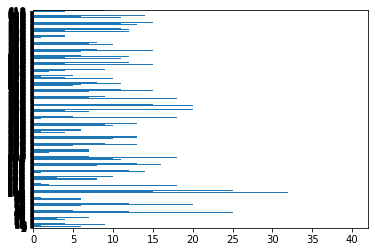

In [151]:
number_bikes = []
for i in range(len(d.data['stations'])):
    number_bikes.append(d.data['stations'][i]['num_bikes_available'])

pd.Series(no_bikes)[0:len(d.data['stations'])-1].plot(kind='barh')

In [152]:
d_station_information.data[0][0]

{'short_name': '31000',
 'rental_uris': {'ios': 'https://dc.lft.to/lastmile_qr_scan',
  'android': 'https://dc.lft.to/lastmile_qr_scan'},
 'capacity': 15,
 'external_id': '082469cc-1f3f-11e7-bf6b-3863bb334450',
 'eightd_station_services': [],
 'electric_bike_surcharge_waiver': False,
 'name': 'Eads St & 15th St S',
 'lat': 38.858971,
 'station_id': '1',
 'eightd_has_key_dispenser': False,
 'lon': -77.05323,
 'has_kiosk': True,
 'region_id': '41',
 'rental_methods': ['KEY', 'CREDITCARD'],
 'legacy_id': '1',
 'station_type': 'classic'}

In [153]:
# Getting the real station names and lat/lon for empty bike stands from https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json

bike_empty_stat_name = []
e_bike_empty_stat_name = []
eb_lat = []
eb_lon = []
e_eb_lat = []
e_eb_lon = []

for i in range(len(d_station_information.data[0])):
    for j in bike_empty_stat_id:
        j = int(j)
        if j == int(d_station_information.data[0][i]['station_id']):
            bike_empty_stat_name.append(d_station_information.data[0][i]['name'])
            eb_lat.append(d_station_information.data[0][i]['lat'])
            eb_lon.append(d_station_information.data[0][i]['lon'])

for i in range(len(d_station_information.data[0])):
    for k in e_bike_empty_stat_id:
        k = int(k)
        if k == int(d_station_information.data[0][i]['station_id']):
            e_bike_empty_stat_name.append(d_station_information.data[0][i]['name'])
            e_eb_lat.append(d_station_information.data[0][i]['lat'])
            e_eb_lon.append(d_station_information.data[0][i]['lon'])

bike_empty_stat = pd.DataFrame(bike_empty_stat_name)
bike_empty_stat_id = pd.DataFrame(bike_empty_stat_id)
eb_lat = pd.DataFrame(eb_lat)
eb_lon = pd.DataFrame(eb_lon)
bike_empty_stat['station_id'] = bike_empty_stat_id
bike_empty_stat['lat'] = eb_lat
bike_empty_stat['lon'] = eb_lon
bike_empty_stat.columns = ['street', 'station_id', 'lat', 'lon']

e_bike_empty_stat = pd.DataFrame(e_bike_empty_stat_name)
e_bike_empty_stat_id = pd.DataFrame(e_bike_empty_stat_id)
e_eb_lat = pd.DataFrame(e_eb_lat)
e_eb_lon = pd.DataFrame(e_eb_lon)
e_bike_empty_stat['station_id'] = e_bike_empty_stat_id
e_bike_empty_stat['lat'] = e_eb_lat
e_bike_empty_stat['lon'] = e_eb_lon
e_bike_empty_stat.columns = ['street', 'station_id', 'lat', 'lon']

# print('Stations names without bikes: ', bike_empty_stat_name)
# print('Stations names without e-bikes: ', e_bike_empty_stat_name)

In [154]:
d_station_information.data[0][2]

{'short_name': '31002',
 'rental_uris': {'ios': 'https://dc.lft.to/lastmile_qr_scan',
  'android': 'https://dc.lft.to/lastmile_qr_scan'},
 'capacity': 17,
 'external_id': '08246c35-1f3f-11e7-bf6b-3863bb334450',
 'eightd_station_services': [],
 'electric_bike_surcharge_waiver': False,
 'name': 'Crystal Dr & 20th St S',
 'lat': 38.856425,
 'station_id': '3',
 'eightd_has_key_dispenser': False,
 'lon': -77.049232,
 'has_kiosk': True,
 'region_id': '41',
 'rental_methods': ['KEY', 'CREDITCARD'],
 'legacy_id': '3',
 'station_type': 'classic'}

In [155]:
d_station_information.data[0][8]['lat']

38.848466

In [156]:
# Building map for all bike stations

all_stations = []
station_id = []
lat = []
lon = []

for i in range(len(d_station_information.data[0])):
    all_stations.append(d_station_information.data[0][i]['name'])
    station_id.append(d_station_information.data[0][i]['station_id'])
    lat.append(d_station_information.data[0][i]['lat'])
    lon.append(d_station_information.data[0][i]['lon'])

all_stations = pd.DataFrame(all_stations)
station_id = pd.DataFrame(station_id)
lat = pd.DataFrame(lat)
lon = pd.DataFrame(lon)
all_stations['station_id'] = station_id
all_stations['lat'] = lat
all_stations['lon'] = lon
all_stations.columns = ['street', 'station_id', 'lat', 'lon']

In [157]:
# All Bike Stations

fig = px.scatter_mapbox(all_stations,
                    lat='lat',
                    lon='lon',
                    hover_name="street",
                    zoom=9)
fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(title = 'All Bike Stations')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [164]:
# Empty Bike Stations

fig = px.scatter_mapbox(bike_empty_stat,
                    lat='lat',
                    lon='lon',
                    hover_name="street",
                    color_discrete_sequence=['red'],
                    zoom=10)
fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(title = 'All Bike Stations')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [163]:
d_station_information.data[0][0:2]

[{'short_name': '31000',
  'rental_uris': {'ios': 'https://dc.lft.to/lastmile_qr_scan',
   'android': 'https://dc.lft.to/lastmile_qr_scan'},
  'capacity': 15,
  'external_id': '082469cc-1f3f-11e7-bf6b-3863bb334450',
  'eightd_station_services': [],
  'electric_bike_surcharge_waiver': False,
  'name': 'Eads St & 15th St S',
  'lat': 38.858971,
  'station_id': '1',
  'eightd_has_key_dispenser': False,
  'lon': -77.05323,
  'has_kiosk': True,
  'region_id': '41',
  'rental_methods': ['KEY', 'CREDITCARD'],
  'legacy_id': '1',
  'station_type': 'classic'},
 {'short_name': '31001',
  'rental_uris': {'ios': 'https://dc.lft.to/lastmile_qr_scan',
   'android': 'https://dc.lft.to/lastmile_qr_scan'},
  'capacity': 11,
  'external_id': '08246b69-1f3f-11e7-bf6b-3863bb334450',
  'eightd_station_services': [],
  'electric_bike_surcharge_waiver': False,
  'name': '18th St & S Eads St',
  'lat': 38.85725,
  'station_id': '2',
  'eightd_has_key_dispenser': False,
  'lon': -77.05332,
  'has_kiosk': True,